In [5]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
users_df = pd.read_parquet('data/credit_card_users_de.parquet')
users_df

,Person,Current Age,Retirement Age,Birth Year,Birth Month,Gender,Address,Apartment,City,State,Zipcode,Latitude,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards
0,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5
1,Sasha Sadr,53,68,1966,12,Female,3606 Federal Boulevard,NaN,Little Neck,NY,11363,40.76,-73.74,$37891,$77254,$191349,701,5
2,Saanvi Lee,81,67,1938,11,Female,766 Third Drive,NaN,West Covina,CA,91792,34.02,-117.89,$22681,$33483,$196,698,5
3,Everlee Clark,63,63,1957,1,Female,3 Madison Street,NaN,New York,NY,10069,40.71,-73.99,$163145,$249925,$202328,722,4
4,Kyle Peterson,43,70,1976,9,Male,9620 Valley Stream Drive,NaN,San Francisco,CA,94117,37.76,-122.44,$53797,$109687,$183855,675,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jose Faraday,32,70,1987,7,Male,6577 Lexington Lane,9.0,Freeport,NY,11520,40.65,-73.58,$23550,$48010,$87837,703,3
1996,Ximena Richardson,62,65,1957,11,Female,2 Elm Drive,955.0,Independence,KY,41051,38.95,-84.54,$24218,$49378,$104480,740,4
1997,Annika Russell,47,67,1973,1,Female,276 Fifth Boulevard,NaN,Elizabeth,NJ,7201,40.66,-74.19,$15175,$30942,$71066,779,3
1998,Juelz Roman,66,60,1954,2,Male,259 Valley Boulevard,NaN,Camp Hill,PA,17011,40.24,-76.92,$25336,$54654,$27241,618,1


In [3]:
cards_df = pd.read_parquet('data/sd254_cards_de.parquet')
cards_df.head()

,User,CARD INDEX,Card Brand,Card Type,Card Number,Expires,CVV,Has Chip,Cards Issued,Credit Limit,Acct Open Date,Year PIN last Changed,Card on Dark Web
0,0,0,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No
1,0,1,Visa,Debit,4956965974959986,12/2020,393,YES,2,$21968,04/2014,2014,No
2,0,2,Visa,Debit,4582313478255491,02/2024,719,YES,2,$46414,07/2003,2004,No
3,0,3,Visa,Credit,4879494103069057,08/2024,693,NO,1,$12400,01/2003,2012,No
4,0,4,Mastercard,Debit (Prepaid),5722874738736011,03/2009,75,YES,1,$28,09/2008,2009,No


In [4]:
transactions_df = pd.read_parquet('data/credit_card_transaction_data_de.parquet')
transactions_df.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
4136,0,0,2016,1,3,10:48,$66.48,Chip Transaction,-3345936507911876459,La Verne,CA,91750.0,7538,None,No
4137,0,0,2016,1,4,06:43,$40.02,Chip Transaction,-34551508091458520,La Verne,CA,91750.0,5912,None,No
4138,0,0,2016,1,7,09:30,$54.11,Chip Transaction,4055257078481058705,La Verne,CA,91750.0,7538,None,No
4139,0,0,2016,1,7,16:03,$89.48,Chip Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,None,No
4140,0,0,2016,1,10,06:38,$29.15,Chip Transaction,-5475680618560174533,Monterey Park,CA,91755.0,5942,None,No


##### Explore the data

In [6]:
users_df.describe()

,Current Age,Retirement Age,Birth Year,Birth Month,Apartment,Zipcode,Latitude,Longitude,FICO Score,Num Credit Cards
count,2000.000000,2000.000000,2000.000000,2000.000000,528.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,45.391500,66.237500,1973.803000,6.439000,693.547348,50535.412000,37.389225,-91.554765,709.734500,3.073000
std,18.414092,3.628867,18.421234,3.565338,1897.157861,29359.754742,5.114324,16.283293,67.221949,1.637379
min,18.000000,50.000000,1918.000000,1.000000,1.000000,1060.000000,20.880000,-159.410000,480.000000,1.000000
25%,30.000000,65.000000,1961.000000,3.000000,5.000000,28214.250000,33.837500,-97.395000,681.000000,2.000000
50%,44.000000,66.000000,1975.000000,7.000000,10.000000,46305.500000,38.250000,-86.440000,711.500000,3.000000
75%,58.000000,68.000000,1989.000000,10.000000,95.250000,77086.250000,41.200000,-80.130000,753.000000,4.000000
max,101.000000,79.000000,2002.000000,12.000000,9940.000000,99508.000000,61.200000,-68.670000,850.000000,9.000000


In [7]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Person                       2000 non-null   object 
 1   Current Age                  2000 non-null   int64  
 2   Retirement Age               2000 non-null   int64  
 3   Birth Year                   2000 non-null   int64  
 4   Birth Month                  2000 non-null   int64  
 5   Gender                       2000 non-null   object 
 6   Address                      2000 non-null   object 
 7   Apartment                    528 non-null    float64
 8   City                         2000 non-null   object 
 9   State                        2000 non-null   object 
 10  Zipcode                      2000 non-null   int64  
 11  Latitude                     2000 non-null   float64
 12  Longitude                    2000 non-null   float64
 13  Per Capita Income 

In [8]:
users_df = users_df.drop('Apartment', axis=1)

In [9]:
cards_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6146 entries, 0 to 6145
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   User                   6146 non-null   int64 
 1   CARD INDEX             6146 non-null   int64 
 2   Card Brand             6146 non-null   object
 3   Card Type              6146 non-null   object
 4   Card Number            6146 non-null   int64 
 5   Expires                6146 non-null   object
 6   CVV                    6146 non-null   int64 
 7   Has Chip               6146 non-null   object
 8   Cards Issued           6146 non-null   int64 
 9   Credit Limit           6146 non-null   object
 10  Acct Open Date         6146 non-null   object
 11  Year PIN last Changed  6146 non-null   int64 
 12  Card on Dark Web       6146 non-null   object
dtypes: int64(6), object(7)
memory usage: 624.3+ KB


In [10]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6877837 entries, 4136 to 24386731
Data columns (total 15 columns):
 #   Column          Dtype  
---  ------          -----  
 0   User            int64  
 1   Card            int64  
 2   Year            int64  
 3   Month           int64  
 4   Day             int64  
 5   Time            object 
 6   Amount          object 
 7   Use Chip        object 
 8   Merchant Name   int64  
 9   Merchant City   object 
 10  Merchant State  object 
 11  Zip             float64
 12  MCC             int64  
 13  Errors?         object 
 14  Is Fraud?       object 
dtypes: float64(1), int64(7), object(7)
memory usage: 839.6+ MB


<Axes: xlabel='Longitude', ylabel='Latitude'>

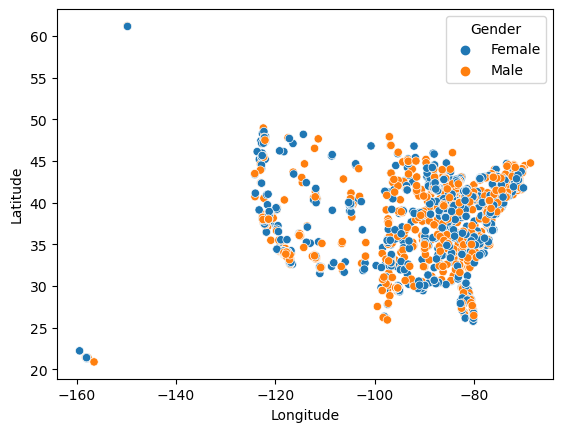

In [19]:
# see users data locations
sns.scatterplot(data=users_df, x='Longitude', y='Latitude', hue='Gender')

<Axes: xlabel='Longitude', ylabel='Latitude'>

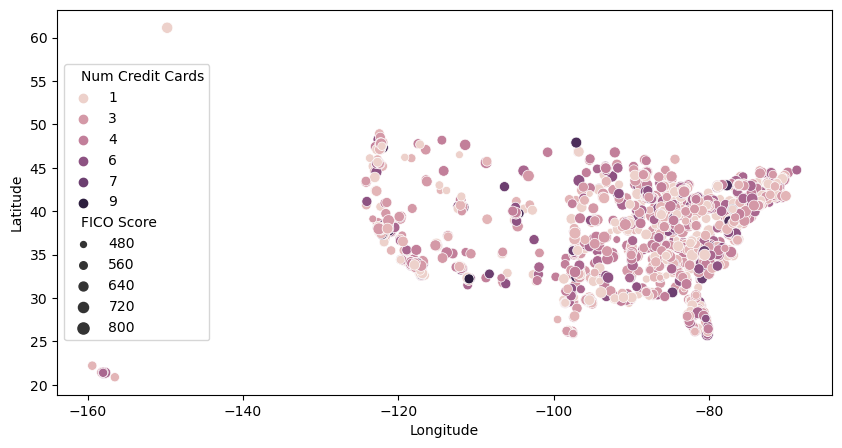

In [29]:
# Visualize the records based on their location on the map and the number of credict cards they have. The size of each marker is the users FICO score.
plt.figure(figsize=(10, 5))
sns.scatterplot(data=users_df, x='Longitude', y='Latitude', hue='Num Credit Cards', size='FICO Score')

<Axes: xlabel='Gender', ylabel='count'>

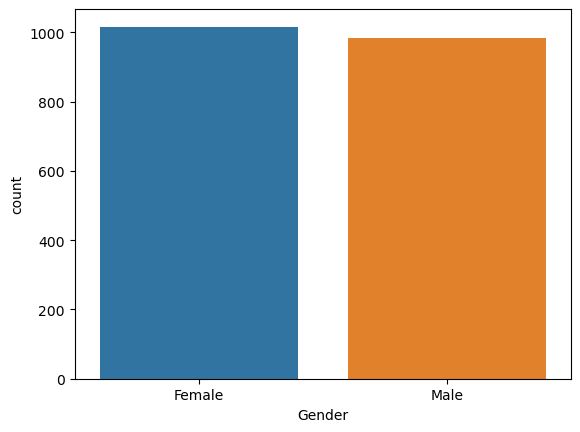

In [31]:
# Check what is the ratio of the  male and female in the dataset
sns.countplot(data=users_df, x='Gender')

<Axes: xlabel='Card Brand', ylabel='count'>

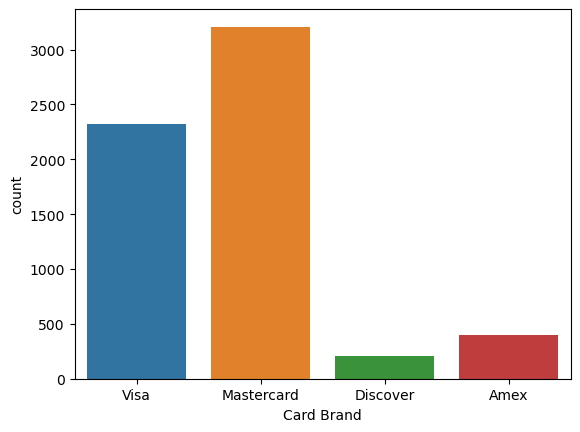

In [33]:
# Check how many cards we have for each brand
sns.countplot(data=cards_df, x='Card Brand')

It is important to know how many brands do we have in the data to be able to find which card has more potential for fraud.

In [34]:
cards_df.columns

Index(['User', 'CARD INDEX', 'Card Brand', 'Card Type', 'Card Number',
       'Expires', 'CVV', 'Has Chip', 'Cards Issued', 'Credit Limit',
       'Acct Open Date', 'Year PIN last Changed', 'Card on Dark Web'],
      dtype='object')

<Axes: xlabel='Card Brand', ylabel='count'>

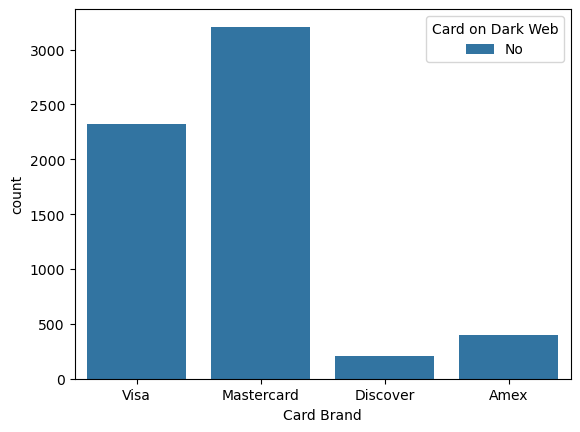

In [36]:
sns.countplot(data=cards_df, x='Card Brand', hue='Card on Dark Web')

It appears all the crads information we have are not on dard web. Therefore, it is safe to drop that column.

In [38]:
cards_df = cards_df.drop('Card on Dark Web', axis=1)
cards_df.head()

,User,CARD INDEX,Card Brand,Card Type,Card Number,Expires,CVV,Has Chip,Cards Issued,Credit Limit,Acct Open Date,Year PIN last Changed
0,0,0,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008
1,0,1,Visa,Debit,4956965974959986,12/2020,393,YES,2,$21968,04/2014,2014
2,0,2,Visa,Debit,4582313478255491,02/2024,719,YES,2,$46414,07/2003,2004
3,0,3,Visa,Credit,4879494103069057,08/2024,693,NO,1,$12400,01/2003,2012
4,0,4,Mastercard,Debit (Prepaid),5722874738736011,03/2009,75,YES,1,$28,09/2008,2009


In [39]:
users_df.columns

Index(['Person', 'Current Age', 'Retirement Age', 'Birth Year', 'Birth Month',
       'Gender', 'Address', 'City', 'State', 'Zipcode', 'Latitude',
       'Longitude', 'Per Capita Income - Zipcode', 'Yearly Income - Person',
       'Total Debt', 'FICO Score', 'Num Credit Cards'],
      dtype='object')

In [40]:
cards_df.columns

Index(['User', 'CARD INDEX', 'Card Brand', 'Card Type', 'Card Number',
       'Expires', 'CVV', 'Has Chip', 'Cards Issued', 'Credit Limit',
       'Acct Open Date', 'Year PIN last Changed'],
      dtype='object')

In [41]:
transactions_df.columns

Index(['User', 'Card', 'Year', 'Month', 'Day', 'Time', 'Amount', 'Use Chip',
       'Merchant Name', 'Merchant City', 'Merchant State', 'Zip', 'MCC',
       'Errors?', 'Is Fraud?'],
      dtype='object')